In [1]:
run pricing

In [2]:
plt.rcParams["font.family"] = 'Times New Roman'  # 'serif', 'sans-serif', 'Times New Roman'
plt.rcParams['text.usetex'] = True
plt.rcParams["axes.unicode_minus"] = False

### Calculate $\kappa(M)$

Recall that the stability condition is
$$\kappa(M) + \delta > 0.$$

In [3]:
# Using 1-year treasury bill rate
def kap_M(μ_R=1.006230606825128,    # constant term of {R_t^a}
          ρ_R=0.9407262699728842,   # autocorrelation coefficient of {R_t^a}
          σ_R=0.030020587135876593,  # standard deviation of {R_t^a}
          size=101):
    "Reports stability of a given instance."
    Ra_vals, Π = build_dynamics(μ_R=μ_R*(1-ρ_R), ρ_R=ρ_R, 
                                σ_R=σ_R*np.sqrt(1-ρ_R**2), size=size)
    R_vals = Ra_vals**(1/4)
    D = np.diag(1 / R_vals)          # diag{..., (1/R_i), ...}
    G = max(np.abs(eigvals(Π @ D)))  # spectral radius of ΠD
    return -np.log(G)

In [4]:
kap_M()

0.0005507569133617591

### Contour plot of $\kappa(M)$ versus $(\mu_R, \sigma_R)$

In [5]:
def contour_κ(μ_min=0.9, μ_max=1.15, μ_size=100,
              σ_min=0.001, σ_max=0.1, σ_size=100):
    """
    Evaluate κ(M) for a class of (μ_R, σ_R) values.
    """
    μ_space = np.linspace(μ_min, μ_max, μ_size)
    σ_space = np.linspace(σ_min, σ_max, σ_size)
    
    κ_mat = np.empty((μ_size, σ_size))  # create empty matrix to store κ(M) values
    
    for (i_μ, μ) in enumerate(μ_space):
        for (i_σ, σ) in enumerate(σ_space):
            κ_mat[i_μ, i_σ] = kap_M(μ_R=μ, σ_R=σ)
    
    return κ_mat, μ_space, σ_space

In [6]:
κ_mat, μ_space, σ_space = contour_κ()

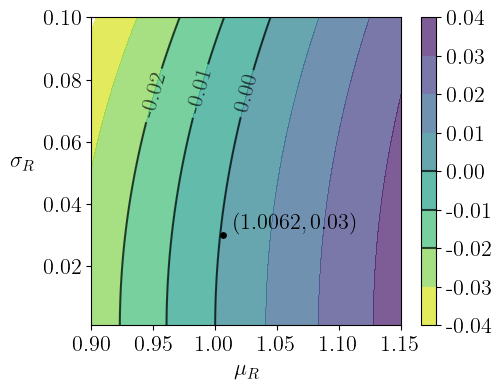

In [7]:
fig, ax = plt.subplots(figsize=(5,4))
μ_mesh, σ_mesh = np.meshgrid(μ_space, σ_space)
csf = ax.contourf(μ_mesh, σ_mesh, κ_mat.T, levels=np.linspace(-0.04, 0.04, 9), 
                  alpha=0.7, cmap='viridis_r') # GnBu viridis_r
cb = fig.colorbar(csf, ax=ax, format='%.2f')
cb.ax.tick_params(labelsize=16)

levels=[-0.02,-0.01, 0]
cs = ax.contour(μ_mesh, σ_mesh, κ_mat.T, colors='black', alpha=0.7,
                levels=levels, linewidths=[1.5], linestyles='-')
ax.clabel(cs, inline=1, fontsize=16, fmt="%1.2f", 
          manual=[(0.95,0.075), (1.,0.075), (1.03,0.075)]) 
cb.add_lines(cs)

ax.set_xlabel("$\mu_R$", fontsize=16)
ax.set_ylabel("$\sigma_R$", fontsize=16, rotation=0, labelpad=15)

ax.scatter([1.0063], [0.03], s=15, color='black')
ax.text(1.015, 0.032, "$(1.0062, 0.03)$", fontsize=16, alpha=1)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.savefig('../output/figures/stab_1.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()

### Contour plot of $\kappa(M)$ versus $(\rho_R, \mu_R)$

In [8]:
def contour_κ3(ρ_min=0., ρ_max=0.99, ρ_size=100,
               μ_min=0.9, μ_max=1.15, μ_size=100):
    """
    Evaluate κ(M) for a class of (ρ_R, μ_R) values.
    """
    ρ_space = np.linspace(ρ_min, ρ_max, ρ_size)
    μ_space = np.linspace(μ_min, μ_max, μ_size)
    
    κ_mat = np.empty((ρ_size, μ_size))  # create empty matrix to store κ(M) values
    
    for (i_ρ, ρ) in enumerate(ρ_space):
        for (i_μ, μ) in enumerate(μ_space):
            κ_mat[i_ρ, i_μ] = kap_M(ρ_R=ρ, μ_R=μ)
    
    return κ_mat, ρ_space, μ_space

In [9]:
κ_mat, ρ_space, μ_space = contour_κ3()

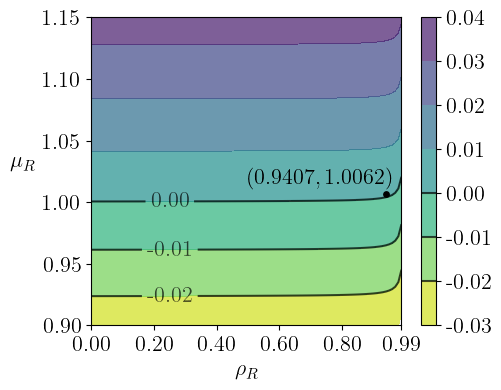

In [10]:
fig, ax = plt.subplots(figsize=(5,4))

ρ_mesh, μ_mesh = np.meshgrid(ρ_space, μ_space)
csf = ax.contourf(ρ_mesh, μ_mesh, κ_mat.T, levels=np.linspace(-0.03, 0.04, 8), 
                  alpha=0.7, cmap='viridis_r')
cb = fig.colorbar(csf, ax=ax, format='%.2f')
cb.ax.tick_params(labelsize=16)

levels=[-0.02, -0.01, 0.]
cs = ax.contour(ρ_mesh, μ_mesh, κ_mat.T, colors='black', alpha=0.7,
                levels=levels, linewidths=[1.5], linestyles='-')
ax.clabel(cs, inline=1, fontsize=16, fmt="%1.2f", 
          manual=[(0.25,0.93), (0.25,0.98), (0.25,1.0)]) 
cb.add_lines(cs)

ax.scatter([0.9407], [1.0063], s=15, color='black')
ax.text(0.5, 1.015, "$(0.9407,1.0062)$", fontsize=16)

ax.set_xlabel("$\\rho_R$", fontsize=16)
ax.set_ylabel("$\mu_R$", fontsize=16, rotation=0, labelpad=15)

plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 0.99], fontsize=16)
plt.yticks(fontsize=16)

plt.savefig('../output/figures/stab_2.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()

### Plot $\kappa(M)$ as a function of $\rho_R$

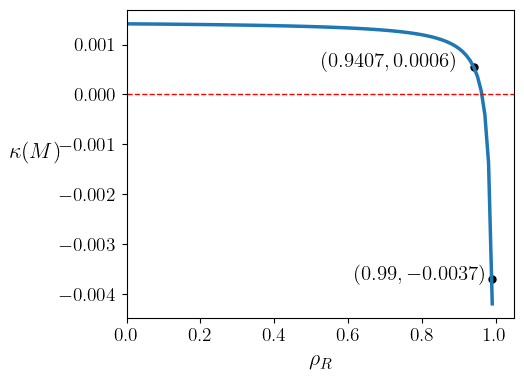

In [11]:
fig, ax = plt.subplots(figsize=(5,4))

ρ_space = np.linspace(0, 0.991, 100)
κ_space = np.empty_like(ρ_space)

for i, ρ in enumerate(ρ_space):
    κ_space[i] = kap_M(ρ_R=ρ)

ax.plot(ρ_space, κ_space, lw=2.5)
ax.axhline(0, ls='--', color='r', lw=1)

kap = kap_M()
ax.scatter(0.9407, kap, color='black', s=25)
ax.text(0.53, kap, f'$(0.9407, {round(kap, 4)})$', fontsize=15)

kap = kap_M(ρ_R=0.99)
ax.scatter(0.99, kap, color='black', s=25)
ax.text(0.62, kap, f'$(0.99, {round(kap, 4)})$', fontsize=15)

ax.set_xlim(0, 1.05)
ax.set_xlabel('$\\rho_R$', fontsize=16)
ax.set_ylabel('$\kappa(M)$', fontsize=16, rotation=0, labelpad=16)
ax.tick_params(labelsize=14)

plt.show()

### Contour plot of $\kappa(M)$ versus $(\rho_R, \sigma_R)$

In [12]:
def contour_κ2(ρ_min=0., ρ_max=0.995, ρ_size=100,
               σ_min=0.001, σ_max=0.12, σ_size=100):
    """
    Evaluate κ(M) for a class of (ρ_R, σ_R) values.
    """
    ρ_space = np.linspace(ρ_min, ρ_max, ρ_size)
    σ_space = np.linspace(σ_min, σ_max, σ_size)
    
    κ_mat = np.empty((ρ_size, σ_size))  # create empty matrix to store κ(M) values
    
    for (i_ρ, ρ) in enumerate(ρ_space):
        for (i_σ, σ) in enumerate(σ_space):
            κ_mat[i_ρ, i_σ] = kap_M(ρ_R=ρ, σ_R=σ)
    
    return κ_mat, ρ_space, σ_space

In [13]:
κ_mat, ρ_space, σ_space = contour_κ2()

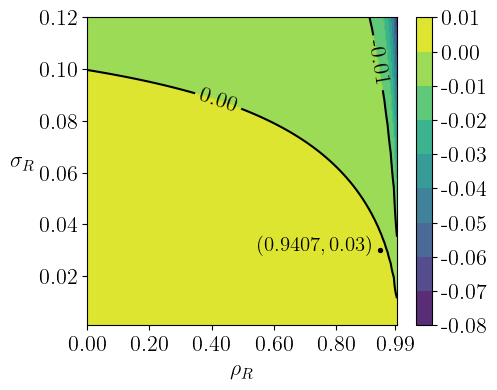

In [14]:
fig, ax = plt.subplots(figsize=(5,4))

ρ_mesh, σ_mesh = np.meshgrid(ρ_space, σ_space)
csf = ax.contourf(ρ_mesh, σ_mesh, κ_mat.T, 
                  levels=np.linspace(-0.08, 0.01, 10), 
                  alpha=0.9)
cb = fig.colorbar(csf, ax=ax, format='%.2f')
cb.ax.tick_params(labelsize=16)

levels=[-0.01, 0.]
cs = ax.contour(ρ_mesh, σ_mesh, κ_mat.T, colors='black', 
                levels=levels, linewidths=[1.5], linestyles='-')
ax.clabel(cs, inline=1, fontsize=16, fmt="%1.2f",
          manual=[(0.4,0.08), (0.8,0.1)]) 
# cb.add_lines(cs)

ax.scatter([0.9407262699728842], [0.030020587135876593], s=8, color='black')
ax.text(0.55, 0.03, "$(0.9407,0.03)$", fontsize=15)

ax.set_xlabel("$\\rho_R$", fontsize=16)
ax.set_ylabel("$\sigma_R$", fontsize=16, rotation=0, labelpad=12)

plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 0.99], fontsize=16)
plt.yticks(fontsize=16)

plt.show()